## Contexto

Una entidad bancaria acaba de realizar una campaña de marketing, cuyo objetivo buscaba lograr que los clientes contactados depositaran sus ahorros a plazo fijo. Los resultados fueron peor de lo esperado.
Esta campaña se enfocó en un 10% de la cartera total de clientes del banco.

El banco contrata nuestros servicios como científic@ de datos y nos comunica los siguintes objetivos:

* Repetir una o más campañas en el transcurso de los siguientes 18 meses. 
* Maximizar la tasa de conversión de las mismas y entender los factores que influyen en esta tasa.

El banco nos provee la lista de los ~4.5K clientes ("clientes.csv")
https://drive.google.com/file/d/1y3sPhGrLUW5DPunat__2xp2NAWJVDWIL/view?usp=sharing
que fueron contactados durante esta última campaña y nos informa que por el momento NO nos proveerá de mas datos que estos.


Nuestra tarea consiste en ayudar al banco a cumplir sus objetivos.

### Metadata

#### Datos clientes
1. age: edad del clietne
2. job: tipo de trabajo
3. marital: estado civil
4. education: nivel de educación
5. default: indica si el cliente registra algún default crediticio
5. balance: saldo en dólares de la caja de ahorro del cliente
6. housing: indica si el cliente posee un préstamo hipotecario
7. loan: indica si el cliente posee algún préstamo personal

#### Datos del último contacto de la campaña actual
9. contact: canal de contacto
10. day: día de último contacto
11. month: mes de último contacto
12. duration: duracion del último contacto
13. campaign: cantidad de contactos durante la campaña

#### Datos campaña previa
14. pdays: días transcurridos desde el último contacto por una campaña previa
15. previous: cantidad de contactos previous a esta campaña
16. poutcome: resultado de la campaña previa

#### Resultado campaña actual
17. y - Indica si el cliente realizó depósito a plazo fijo(binaria: 'yes','no')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

In [2]:
df = pd.read_csv("datos/clientes.csv", sep = ';')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df["y"] = df["y"].replace(['no','yes'],[0,1])

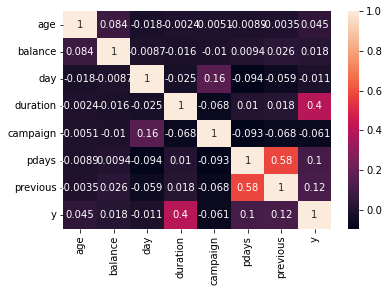

In [5]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [19]:
gr_y_duracion = df.groupby("y")["duration"].agg(["count", "mean"])
gr_y_duracion.columns = ["cantidad", "duracion_promedio"]
gr_y_duracion

,cantidad,duracion_promedio
y,,
0,4000,226.347500
1,521,552.742802


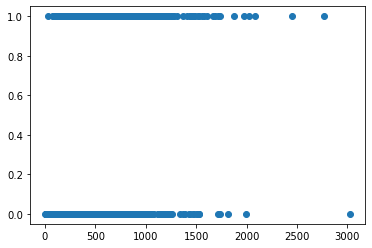

In [7]:
plt.scatter(df["duration"], df["y"])
plt.show()

In [8]:
log_model_data = df[["duration", "y"]]

X = log_model_data[["duration"]]
y = log_model_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
##xtrain = sc_x.fit_transform(X_train)
#xtest = sc_x.transform(X_test)

#print(xtrain[0:10, :])

In [10]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = classifier.predict(X_train)

In [12]:
classifier.predict_proba(X)

array([[0.95252846, 0.04747154],
       [0.92519316, 0.07480684],
       [0.93309351, 0.06690649],
       ...,
       [0.94002021, 0.05997979],
       [0.94413838, 0.05586162],
       [0.8895455 , 0.1104545 ]])

In [13]:
classifier.score(X, y)

0.8889626188896262

In [14]:
classifier.predict([[2000]])

C:\Users\agusd\anaconda3\envs\POO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)